## Respostas Segunda prova de Aprendizado de Máquina
- Edwin Jahir Rueda Rojas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from PIL import Image
%matplotlib inline

### Ponto 1

1) [2.0 pts] Use os dados Breast Cancer Wisconsin (Diagnostic) Data Set do UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Use validação cruzada para avaliar qual dos algoritmos tem maior acurácia nos dados:
- SVM Linear
- SVM RBF  <br>
Decida que tipo de padronização (normalização) dos dados você usará para cada algoritmo (ou nenhuma). justifique.

In [2]:
data = pd.read_csv("./data/wdbc.csv", header=None)
print(data.shape)
data = data.drop(0, axis=1)
data.head()

(569, 32)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = data.iloc[:, 1:]
y = np.array(data.iloc[:,0].values)

In [4]:
for idx in range(len(y)):
    if y[idx]=="M":
        y[idx]=1
    elif y[idx]=="B":
        y[idx]=0

In [5]:
y = y.astype(int)

In [6]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf1 = svm.SVC(kernel='linear') #kernel lineal
score1 = cross_val_score(clf1, X, y, n_jobs=2, cv=10)

score promedio:  0.9543179068360554


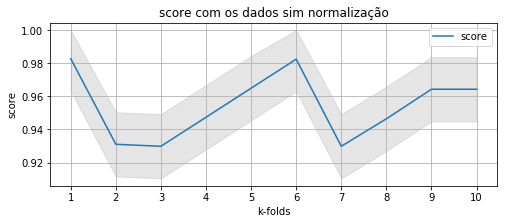

In [7]:
plt.figure(figsize=(8,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("score com os dados sim normalização")
plt.xlabel("k-folds")
plt.ylabel("score")
x = range(1,11)
plt.plot(x, score1, label="score", linewidth=1.5)
print("score promedio: ", np.mean(score1))
upper = score1 + np.std(score1)
upper[upper>1]=1
plt.fill_between(x, upper, score1 - np.std(score1), alpha=0.2, color='grey')
plt.legend();

### Scalando os dados

In [8]:
def data_scale(df, l_cols=-1):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar, por defecto -1 para escalar todas
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    df_scale = df.copy()
    if l_cols == -1:
        l_cols = df.columns
    for col in l_cols:
        #se cambia cada columna
        #df_scale[col] = (df_scale[col] - min(df_scale[col]))/(max(df_scale[col]) - min(df_scale[col]))
        df_scale[col] = (df_scale[col] - min(df_scale[col]))/((max(df_scale[col]) - min(df_scale[col])))
    return df_scale

In [9]:
data.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [10]:
#Escalando os dados
X_scale = data_scale(X)

score promedio com o SVM Linear 0.9772210699161695


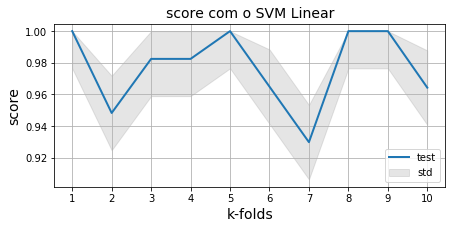

In [11]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf2 = svm.SVC(kernel='linear') #kernel lineal
score2 = cross_val_score(clf2, X_scale, y, n_jobs=2, cv=10)

plt.figure(figsize=(7,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("score com o SVM Linear", size=14)
plt.xlabel("k-folds", size=14)
plt.ylabel("score", size=14)
plt.plot(range(1,11), score2, label="test", linewidth=2)
print("score promedio com o SVM Linear", np.mean(score2))
upper2 = score2 + np.std(score2)
upper2[upper2>1]=1
plt.fill_between(x, upper2, score2 - np.std(score2), alpha=0.2, color='grey', label="std")
plt.legend(loc=4);

score promedio do SVM RBF:  0.9527180019013048


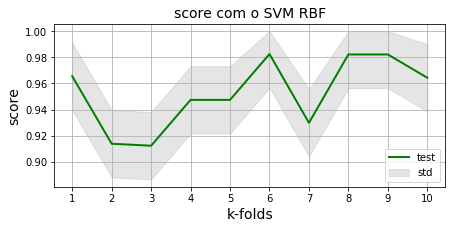

In [12]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf3 = svm.SVC(kernel='rbf') #kernel lineal
score3 = cross_val_score(clf3, X_scale, y, n_jobs=2, cv=10)

plt.figure(figsize=(7,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("score com o SVM RBF", size=14)
plt.xlabel("k-folds", size=14)
plt.ylabel("score", size=14)
plt.plot(x, score3, label="test", linewidth=2, color="green")
print("score promedio do SVM RBF: ", np.mean(score3))
upper2 = score3 + np.std(score3)
upper2[upper2>1]=1
plt.fill_between(x, upper2, score3 - np.std(score3), alpha=0.2, color='grey', label="std")
plt.legend(loc=4);

#### gráfico da relação dos scores

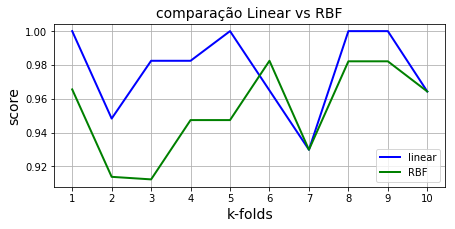

In [13]:
plt.figure(figsize=(7,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("comparação Linear vs RBF", size=14)
plt.xlabel("k-folds", size=14)
plt.ylabel("score", size=14)
plt.plot(x, score2,  linewidth=2, color="blue", label="linear")
plt.plot(x, score3,  linewidth=2, color="green", label="RBF")
plt.legend(loc=4);

### Clonclução
- o modelo SVM com o kernel linear é melhor que o SVM com kernel RBF já que ele é melhor o igual em todos os k-folds, como o gráfico anterior mostra.

### Ponto 2

2) [2.0 pts] Implemente em uma linguagem de programação de sua escolha uma Rede
Neural Artificial Multilayer Perceptron treinada com o algoritmo backprogation que
resolva o problema do OU-EXCLUSIVO. Para validar sua implementação utilize a
arquitetura apresentada na aula sobre Redes Neurais. Mostre que os resultados foram os
mesmos. Avalie como ficaria a solução se considerarmos uma arquitetura com 2
neurônios na camada escondida e um neurônio na camada de saída. Lembrando que a função
de ativação do neurônio deve ser sigmoide.

-------------------- Arquitectura da rede 1 --------------------


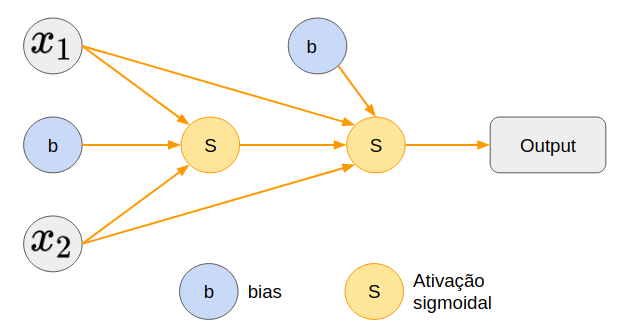

In [2]:
print("-------------------- Arquitectura da rede 1 --------------------")
Image.open("rede1.png")

In [2]:
import numpy as np
class RNN_MLP:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.lr = 0.4 #learning rate
        #inicialización de los pesos en cero
        self.theta1 = np.zeros((X.shape[1] + 1, 1))
        self.theta2 = np.zeros((X.shape[1] + 2, 1))
        self.count = 0
        
    def sigmoid(self, z):
        """
        função para calcular a sigmoide
        """ 
        return (1/(1 + np.exp(-z)))
    
    def get_weigths(self):
        """
        função para retornar os pesos da rede entrenada
        """
        return (self.theta1, self.theta2)
    
    def get_count(self):
        """
        retorna o número de iterações que a rede 
        precisó para converger
        """
        return self.count
    
    def predict(self, X):
        """
        função para predecir a saída esperada
        """
        y_p = []
        for idx in range(X.shape[0]):
            x1 = np.concatenate(([1],X[idx]))
            h1 = self.sigmoid(self.theta1.T.dot(x1)) #hipótesis da camada oculta
            #para computar a saída da camada oculta
            x2 = np.concatenate(([1],X[idx],h1))
            h2 = self.sigmoid(self.theta2.T.dot(x2)) #hipótesis final
            y_p.append(np.float(h2))
        y_p = np.array(y_p)
        y_p[y_p>=0.5] = 1
        y_p[y_p<0.5] = 0
        
        return y_p
    
    def error(self, X, y):
        """
        função para o calculo do erro da rede
        """
        y_p = self.predict(X)
        return np.mean((y_p - y)**2)
    
    
    def train(self,X,y, bias=1):
        """
        função para o treinamento da rede
        X: matriz com os dados de treinamento
        y: vector objetivo
        """
        while (self.error(X,y) != 0):
            for idx in range(X.shape[0]):
                x1 = np.concatenate(([1],X[idx]))
                h1 = self.sigmoid(self.theta1.T.dot(x1)) #hipótesis da camada oculta
                #para computar a saída da camada oculta
                x2 = np.concatenate(([1],X[idx],h1))
                h2 = self.sigmoid(self.theta2.T.dot(x2)) #hipótesis final
                #------------------------------
                #Backpropagation
                #------------------------------
                erro_saida = (y[idx] - h2)*h2*(1 - h2)
                self.theta2 = (self.theta2.T + (self.lr*erro_saida*x2)).T
                erro_interno = h1*(1 - h1)*erro_saida*self.theta2[-1]
                self.theta1 = (self.theta1.T + (self.lr*erro_interno*x1)).T
        
            self.count += 1

In [3]:
X = np.array([[1,0],[0,0],[0,1],[1,1]]) #Entrada XOR
y = np.array([1,0,1,0]) #salida objetivo
obj = RNN_MLP(X, y) #clase para entrenar
obj.train(X,y) #treino do modelo
print("predição do modelo:", obj.predict(X))
print("error do modelo:", obj.error(X, y))

predição do modelo: [1. 0. 1. 0.]
error do modelo: 0.0


In [4]:
print("learning rate:", 0.4)
print("número de iterações do modelo:", obj.count)
print("pesos da camada de entrada:")
print(obj.get_weigths()[0])
print("pesos da camada oculta:")
print(obj.get_weigths()[1])

learning rate: 0.4
número de iterações do modelo: 1575
pesos da camada de entrada:
[[0.65829301]
 [1.43380589]
 [1.45335442]]
pesos da camada oculta:
[[-0.79544225]
 [-0.25472723]
 [-0.26251389]
 [ 1.18628356]]


### Rede com dois neurônios na camada escondida

-------------------- Arquitectura da rede 2 --------------------


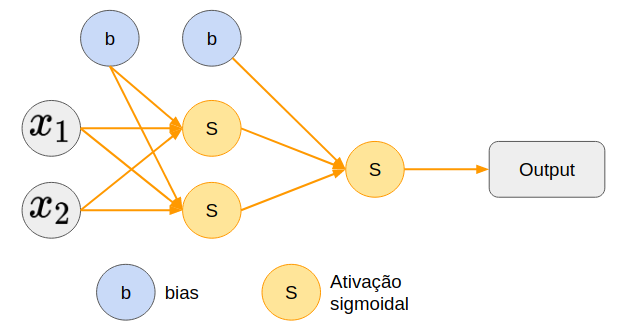

In [5]:
print("-------------------- Arquitectura da rede 2 --------------------")
Image.open("rede2.png")

In [204]:
import numpy as np
class RNN_MLP_2:
    
    def __init__(self, X, y, lr=0.1):
        self.X = X
        self.y = y
        self.lr = lr #learning rate
        self.num_nce = 2 #número de neurônios na camada escondida
        self.num_nsa = 1 #número de nerônios na camada de saída
        #inicialización de los pesos en cero
        #número de pesos na camada escondida(como o bias)
        self.theta1 = np.random.random((X.shape[1]+1, self.num_nce))
        #número de pesos na camada de saída(com o bias)
        self.theta2 = np.random.random(((self.num_nce + 1)*self.num_nsa, 1))
        self.count = 0 #para contar as iterações que a rede faz para converger
    def sigmoid(self, z):
        """
        função para calcular a sigmoide
        """ 
        return (1/(1 + np.exp(-z)))
    
    def get_weigths(self):
        """
        função para retornar os pesos da rede entrenada
        """
        return (self.theta1, self.theta2)
    
    def get_count(self):
        """
        retorna o número de iterações que a rede 
        precisó para converger
        """
        return self.count
    
    def predict(self, X):
        """
        função para predecir a saída esperada
        """
        y_p = []
        for idx in range(X.shape[0]):
            #entrada para a camada inicial
            x1 = np.concatenate(([1],X[idx]))
            #print(self.theta1.shape, x1.shape)
            h1 = self.sigmoid(x1.dot(self.theta1)) #hipótesis da camada oculta
            #para computar a saída da camada oculta
            x2 = np.concatenate(([1],h1))
            h2 = self.sigmoid(x2.dot(self.theta2)) #hipótesis final
            y_p.append(np.float(h2))
        y_p = np.array(y_p)
        y_p[y_p>=0.5] = 1
        y_p[y_p<0.5] = 0
        
        return y_p
    
    def error(self, X, y):
        """
        função para o calculo do erro da rede
        """
        y_p = self.predict(X)
        return np.mean((y_p - y)**2)
    
    
    def train(self,X,y, bias=1):
        """
        função para o treinamento da rede
        X: matriz com os dados de treinamento
        y: vector objetivo
        """
        for i in range(40000): #para quando a rede tenha como erro zero
            for idx in range(X.shape[0]):
                #entrada para a camada inicial
                x1 = np.concatenate(([1],X[idx]))
                #print(self.theta1.shape, x1.shape)
                h1 = self.sigmoid(x1.dot(self.theta1)) #hipótesis da camada oculta
                #para computar a saída da camada oculta
                x2 = np.concatenate(([1],h1))
                h2 = self.sigmoid(x2.dot(self.theta2)) #hipótesis final
                #---------------------------------
                #Backpropagation
                #---------------------------------
                erro_saida = (y[idx] - h2)*h2*(1 - h2)
                self.theta2 = self.theta2 + ((self.lr*erro_saida*x2).T).reshape(3,1)
                erro_interno = h1*(1 - h1)*sum(erro_saida*self.theta2)
                self.theta1 = self.theta1 + (self.lr*erro_interno.reshape(2,1).dot(x1.reshape(1,3))).T 
            if self.error(X, y) == 0:
                break
            self.count += 1

In [210]:
X = np.array([[1,0],[0,0],[0,1],[1,1]]) #Entrada XOR
y = np.array([1,0,1,0]) #salida objetivo
obj = RNN_MLP_2(X, y, lr=0.1) #clase para entrenar
obj.train(X,y) #treino do modelo
print("predição do modelo:", obj.predict(X))
print("error do modelo:", obj.error(X, y))

predição do modelo: [1. 0. 1. 0.]
error do modelo: 0.0


In [211]:
print("pesos da camada de entrada:")
print(obj.get_weigths()[0])
print("pesos da camada oculta:")
print(obj.get_weigths()[1])

pesos da camada de entrada:
[[0.38806811 0.25898045]
 [4.9152757  5.03040498]
 [4.91805205 5.0376233 ]]
pesos da camada oculta:
[[-7.57961129]
 [ 2.60026043]
 [ 5.68566434]]


### Ponto 3

3) [2.0 pts] Dado o conjunto de dados abaixo:
- a) aplique o método de agrupamento aglomerativo utilizando a métrica single-link e o
critério de dissimilariade distância Euclidiana.
- b) aplique o algoritmo K-means utilizando distância Euclidiana considerando K = 2. O
Algoritmo deve parar caso não apresente convergência após 5 iterações. Considere
também que os centros iniciais são: cliente1 e cliente4.
- c) Avalie qual melhor solução de clusterização considerando 3 grupos.

---------------- Dados ----------------


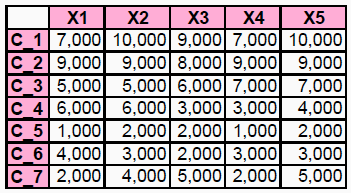

In [7]:
print("---------------- Dados ----------------")
Image.open("ponto3.png")

#### a) aplique o método de agrupamento aglomerativo utilizando a métrica single-link e o critério de dissimilariade distância Euclidiana.

In [17]:
data = pd.read_csv("./data/data_ponto3.csv", names=["X1","X2","X3","X4","X5"])
data

,X1,X2,X3,X4,X5
0,7,10,9,7,10
1,9,9,8,9,9
2,5,5,6,7,7
3,6,6,3,3,4
4,1,2,2,1,2
5,4,3,2,3,3
6,2,4,5,2,5


In [3]:
c_1 = data.iloc[0].values
c_2 = data.iloc[1].values
c_3 = data.iloc[2].values
c_4 = data.iloc[3].values
c_5 = data.iloc[4].values
c_6 = data.iloc[5].values
c_7 = data.iloc[6].values

- Para o cálculo da distância Euclidiana

In [31]:
np.round(np.sqrt(sum((c_5 - c_6)**2)),4)

3.873

--------------- Single Linkage (Euclidiana) ---------------


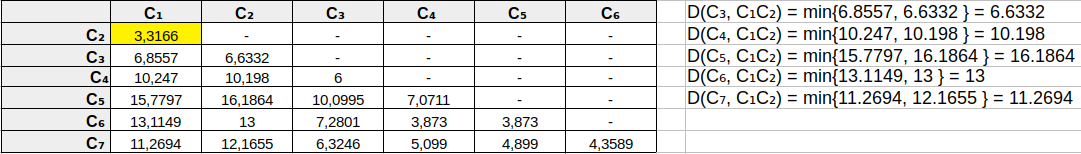

In [5]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_021.png")

--------------- Single Linkage (Euclidiana) ---------------


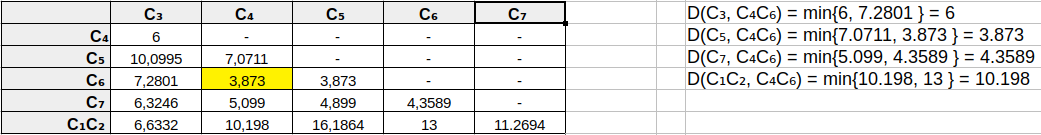

In [6]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_022.png")

--------------- Single Linkage (Euclidiana) ---------------


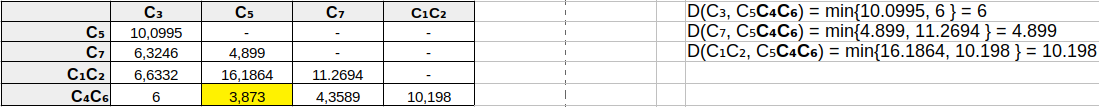

In [7]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_023.png")

--------------- Single Linkage (Euclidiana) ---------------


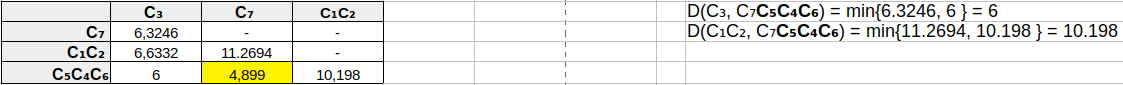

In [8]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_024.png")

--------------- Single Linkage (Euclidiana) ---------------


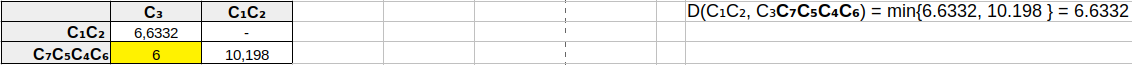

In [9]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_025.png")

--------------- Single Linkage (Euclidiana) ---------------


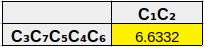

In [11]:
print("--------------- Single Linkage (Euclidiana) ---------------")
Image.open("Selección_026.png")

--------------- Single Linkage (Euclidiana) ---------------
Resulta em:


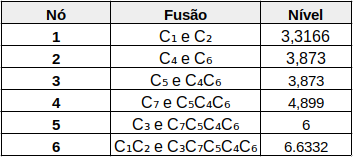

In [13]:
print("--------------- Single Linkage (Euclidiana) ---------------")
print("Resulta em:")
Image.open("Selección_027.png")

--------------- Single Linkage (Euclidiana) ---------------
Gráfico:


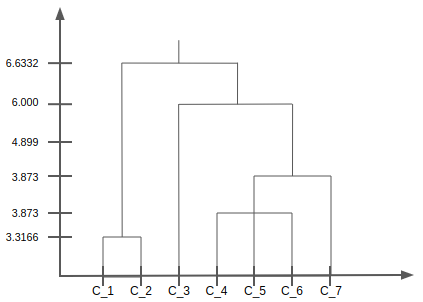

In [14]:
print("--------------- Single Linkage (Euclidiana) ---------------")
print("Gráfico:")
Image.open("Selección_028.png")

#### b) aplique o algoritmo K-means utilizando distância Euclidiana considerando K = 2. O Algoritmo deve parar caso não apresente convergência após 5 iterações. Considere também que os centros iniciais são: cliente1 e cliente4.

In [26]:
data
#seleção dos centros inicias
c1 = data.iloc[0].values
c4 = data.iloc[3].values
print("centroide 1: ", c1)
print("centroide 2: ", c4)

centroide 1:  [ 7 10  9  7 10]
centroide 2:  [6 6 3 3 4]


In [56]:
from sklearn.cluster import KMeans

num_iter = 5 #o algoritmo só apresenta 5 iterações
num_cen = 2 #numero de centros finais
centroides = np.concatenate((c1,c4)).reshape(2,5) #centros iniciais
kmeans = KMeans(n_clusters=num_cen, init=centroides, max_iter=num_iter, n_init=1).fit(data)

In [57]:
new_centers = kmeans.cluster_centers_
print("---------- Resultado ----------")
print("centro 1: ", new_centers[0])
print("centro 2: ", new_centers[1])

---------- Resultado ----------
centro 1:  [8.  9.5 8.5 8.  9.5]
centro 2:  [3.6 4.  3.6 3.2 4.2]


#### c) Avalie qual melhor solução de clusterização considerando 3 grupos.

In [58]:
#o algoritmo vai para ao convergir
#os centros inicias são escohlidos da forma random
num_cen2 = 3 #numero de centros finais
kmeans2 = KMeans(n_clusters=num_cen2).fit(data)

In [61]:
new_centers2 = kmeans2.cluster_centers_
print("---------- Resultado ----------")
print("centro 1: ", new_centers2[0])
print("centro 2: ", new_centers2[1])
print("centro 3: ", new_centers2[2])

---------- Resultado ----------
centro 1:  [3.25 3.75 3.   2.25 3.5 ]
centro 2:  [8.  9.5 8.5 8.  9.5]
centro 3:  [5. 5. 6. 7. 7.]


### Ponto 4

4) [2.0 pts] Implemente o método K-means. Os parâmetros de entrada são número K de
clusters, o número M máximo de iterações, e um arquivo ARFF com o conjunto de treino
(assuma que todos os atributos do ARFF devem ser levados em conta). O critério deparada não precisa ser limitado a usar apenas o valor de M. Faça um tratamento (leve em
conta) para o caso de algum cluster ficar com nenhum vetor associado a ele

In [ ]:
class 